<a href="https://colab.research.google.com/github/arvas123/ComputerVision/blob/main/Activity4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

In [ ]:
# names for the categories 0 through 9 assigned to these images
classNames = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(xTrain, yTrain), (xTest, yTest) = tf.keras.datasets.fashion_mnist.load_data()
trainSize = len(xTrain)
print(trainSize)

4423680/4422102 [==============================] - 0s 0us/step
60000


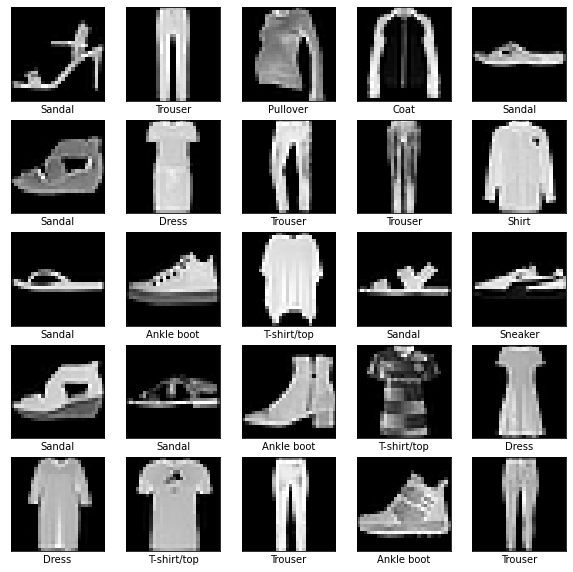

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
  idx=random.randint(0,60000-1)
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xTrain[idx], cmap='gray', vmin=0, vmax=255)
  outputNum = yTrain[idx]
  strLabel = classNames[outputNum]
  plt.xlabel(strLabel)
plt.show()

In [ ]:
xTrain = xTrain / 255.0
xTest = xTest / 255.0
xTrain = xTrain.reshape((-1, 28, 28, 1))
xTest = xTest.reshape((-1, 28, 28, 1))

In [ ]:
# Must define the input shape in the first layer of the neural network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same',
activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same',
activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [ ]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(),
metrics=['accuracy'])

In [ ]:
history = model.fit(xTrain, yTrain, epochs=20, validation_data=(xTest, yTest))

Epoch 1/20
1875/1875 [==============================] - 42s 7ms/step - loss: 0.6520 - accuracy: 0.7603 - val_loss: 0.3606 - val_accuracy: 0.8687
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3468 - accuracy: 0.8731 - val_loss: 0.2972 - val_accuracy: 0.8927
Epoch 3/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3018 - accuracy: 0.8899 - val_loss: 0.2843 - val_accuracy: 0.8962
Epoch 4/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2768 - accuracy: 0.8976 - val_loss: 0.2643 - val_accuracy: 0.9018
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2535 - accuracy: 0.9051 - val_loss: 0.2478 - val_accuracy: 0.9092
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2347 - accuracy: 0.9128 - val_loss: 0.2319 - val_accuracy: 0.9146
Epoch 7/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2253 - accuracy: 0.9173 - val_loss: 0.2358 - val_ac

In [ ]:
# Evaluate the model on test set
eval_loss, eval_acc = model.evaluate(xTest, yTest, verbose=2)
# Print test accuracy
print('\n', 'Test accuracy:', eval_acc)

313/313 - 1s - loss: 0.2218 - accuracy: 0.9232

 Test accuracy: 0.9232000112533569


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


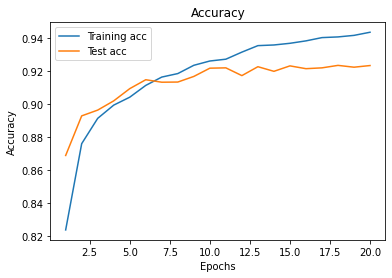

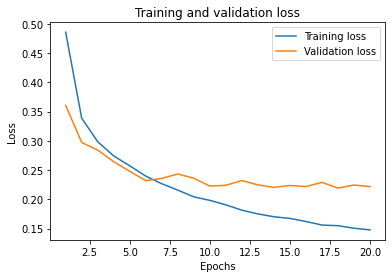

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs,acc, label = 'Training acc')
plt.plot(epochs, val_acc, label = 'Test acc')
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
a = model.predict(xTest)
# print(a)
ans = []
for i in a:
  ma=0
  idx=-1
  for j in range(len(i)):
    if i[j]>ma:
      idx=j
      ma=i[j]
  ans.append(idx)

mat = tf.math.confusion_matrix(yTest,ans)
print(mat)

tf.Tensor(
[[886   0  17  15   3   1  74   1   3   0]
 [  1 974   1  19   1   0   3   0   1   0]
 [ 13   2 898   8  44   0  35   0   0   0]
 [  8   2   9 941  23   0  15   0   2   0]
 [  2   0  35  23 905   0  34   0   1   0]
 [  0   0   0   0   0 986   0   7   0   7]
 [105   0  70  35  83   0 704   0   3   0]
 [  0   0   0   0   0   3   0 986   0  11]
 [  3   1   0   6   1   1   2   0 986   0]
 [  0   0   1   0   0   3   0  30   0 966]], shape=(10, 10), dtype=int32)


In [ ]:
for i in range(10):
  for j in range(i+1,10):
    if mat[i][j]+mat[j][i]>=30:
      print(mat[i][j]+mat[j][i],classNames[i],classNames[j])


tf.Tensor(30, shape=(), dtype=int32) T-shirt/top Pullover
tf.Tensor(179, shape=(), dtype=int32) T-shirt/top Shirt
tf.Tensor(79, shape=(), dtype=int32) Pullover Coat
tf.Tensor(105, shape=(), dtype=int32) Pullover Shirt
tf.Tensor(46, shape=(), dtype=int32) Dress Coat
tf.Tensor(50, shape=(), dtype=int32) Dress Shirt
tf.Tensor(117, shape=(), dtype=int32) Coat Shirt
tf.Tensor(41, shape=(), dtype=int32) Sneaker Ankle boot
